<a href="https://colab.research.google.com/github/Naveenaantony/CROP_PREDICTION-using-ML/blob/main/CROP_PREDICTION_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#import libraries
import pandas as pd
from pandas import read_csv
import numpy as np
import random
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [46]:
#loading dataset
data = pd.read_csv('/content/Crop_recommendation.csv')
print(data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [47]:
data.shape

(2200, 8)

In [48]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [49]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [50]:
#data preprocessing
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [51]:
# checking crops in the dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [52]:
#feature selection
X = data.drop('label', axis=1)
y = data['label']
X.shape
y.shape

(2200,)

In [53]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [54]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [55]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
#train test split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [56]:
#fit the model
from sklearn.naive_bayes import GaussianNB , MultinomialNB

In [57]:
nbg = GaussianNB()
model_nbg = nbg.fit(x_train.values, y_train)
#Checking Score of the model
score_nbg=model_nbg.score(x_test.values, y_test)
score_nbg

0.9939393939393939

In [58]:
nb = MultinomialNB()
model_nb = nb.fit(x_train, y_train)
#Checking Score of the model
score_nb=model_nb.score(x_test, y_test)
score_nb

0.8924242424242425

In [59]:
#applying KNeighbors for Training data
#importing K-Nearest classifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
model_kn = kn.fit(x_train, y_train)

In [60]:
#Checking Score of the model
score_kn=model_kn.score(x_test, y_test)
print("Accuracy for KNeighbor: ",score_kn)

Accuracy for KNeighbor:  0.9742424242424242


In [61]:
#ploting accuracy results
total_score = {"gaussian":score_nbg, "multinomial":score_nb, "kneighbor":score_kn}
total_score

{'gaussian': 0.9939393939393939,
 'multinomial': 0.8924242424242425,
 'kneighbor': 0.9742424242424242}

In [62]:
model = list(total_score.keys())
score = list(total_score.values())

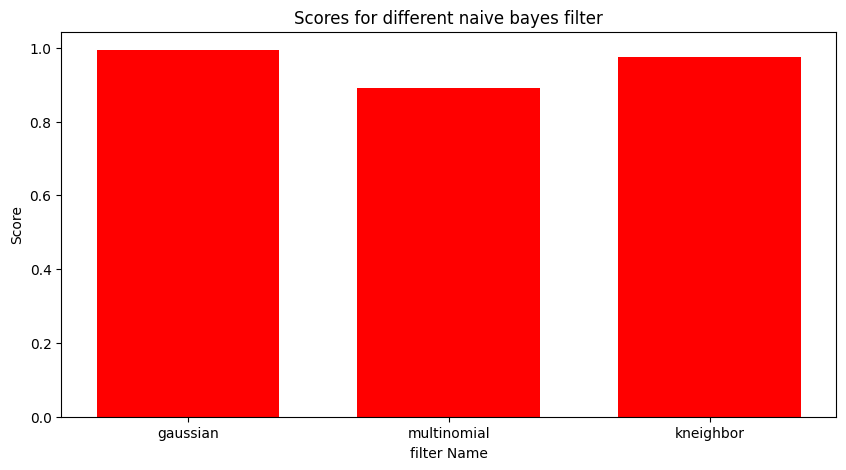

In [63]:
#ploting a Bar graph for different modes and its score
plt.figure(figsize=(10, 5))
plt.bar(model,score,color ='red',width=0.7)
plt.xlabel("filter Name")
plt.ylabel("Score")
plt.title("Scores for different naive bayes filter")
plt.show()

In [64]:
from sklearn.metrics import classification_report
y_pred_nbg = model_nbg.predict(x_test)
print(classification_report(y_test, y_pred_nbg))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.97      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


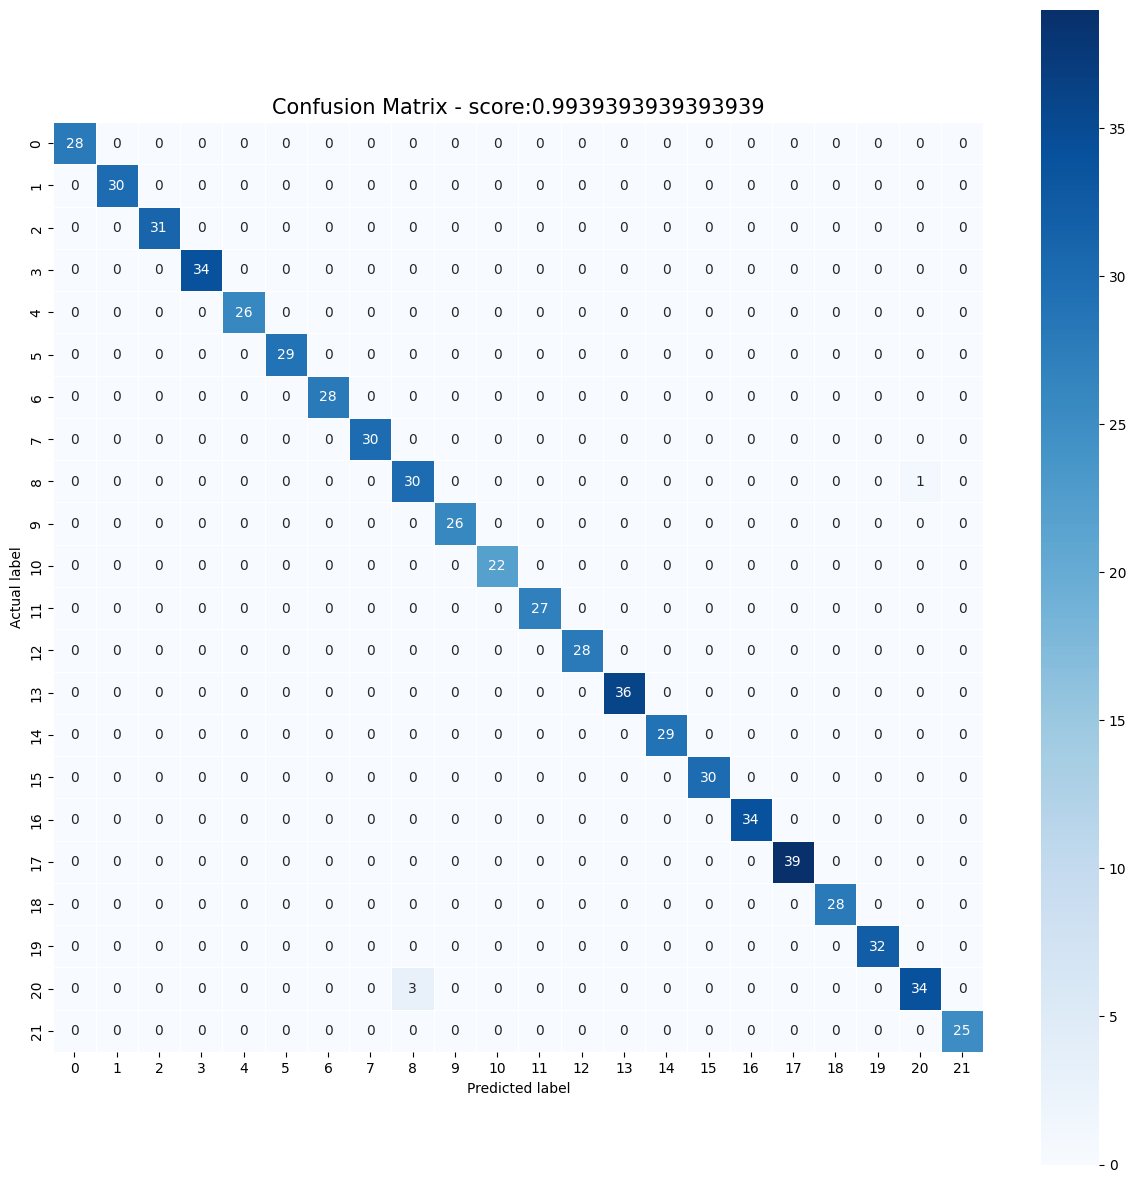

In [65]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_nbg)


plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred_nbg))
plt.title(all_sample_title, size = 15);
plt.show()

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
#prediction using gaussian naive bayes
newdata=model_nbg.predict([[46, 65, 24, 15.879744, 35, 4.5,23]])
newdata

array(['pigeonpeas'], dtype='<U11')